# ICPE 689 Data Science Fundamental for Energy II

Some of the examples and exercises of this course are based on two popular books on data science with Python, [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
and [the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

<span><img src="images/HandsonML.jpg" width="200" /><img src="images/PDSH-cover.png" width="200" /></span>

# Prediction Methods

**Predictive analytics** encompasses a variety of statistical techniques from data mining, predictive modelling, and machine learning that analyze current and historical facts to make predictions about future or otherwise unknown events.

Technically, many machine learning methods are *predictive* to some extent, but regression models are the mainstay for predictive analytics. Furthermore, if time is one of the independent variables, time series analysis could be used for predictive analystics as well.

With that in mind, this module consists of two parts:
1. Regression Analysis

2. Advanded Time Series Analysis

In part 2, after we briefly review the basics of time series analysis, we will demonstrate the usage of [Facebook Prophet](https://facebook.github.io/prophet/) through a real world example.

[<img src="images/colab-badge.png" width="200"/>](https://colab.research.google.com/github/jtao/AdvancedML/blob/main/Prediction_methods.ipynb)

# Linear Regression Models

The linear model implies that the target is specified as a linear combination of features. This section will cover the content listed below: 

- [1 Simple Linear Regression](#1-Simple-Linear-Regression)
- [2 Multiple Linear Regression](#2-Multiple-Linear-Regression)
- [3 Polynomial Regression](#3-Polynomial-Regression)
- [4 Regularization](#4-Regularization)
- [5 Linear Classifier and Logistic Regression](#5-Logistic-Regression)
- [6 Hands-on Exercise](#6-Exercise)
- [Reference](#Reference) 



## Simple Linear Regression

*Simple linear regression* lives up to its name: it's a very straightforward approach for predicting a quantitative $Y$ on the basis of a single predcitor variable $X$, i.e., a straight-line fit to data.  . It assumes that there is an approximately a linear relationship between $X$ and $Y$. Mathematically, we can write this linear relationship as 
$$
Y  = \beta_0 + \beta_1 X + \epsilon
$$

* $\epsilon$ represents the randomness term.
* Sometimes, the equation above is describes by saying that we are regressing $Y$ on $X$ (or $Y$ *onto* X). 
* $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and *slope* terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model *coefficients* or *parameters*. 
* Once we have used our dataset to produce estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ for the model coefficients, we can predict the $Y$ on the basis of $X = x$ which is computed as 
$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x.
$$

The least squares approach chooses $\hat{\beta}_0$ and $\hat{\beta}_1$ to minimize the RSS. Using some calculus, we can show that the minimizers are 
$$
\hat{\beta}_1 = \frac{\sum_{i = 1}^n(x_i-\bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}\\
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x},
$$
where $\bar{y} = \frac{1}{n}\sum_{i = 1}^ny_i$ and $\bar{x} = \frac{1}{n}\sum_{i = 1}^nx_i$ are sample means.
<center><img src="images/linear_regression.png" width="300"/></center>

### Estimate the Coefficients
In practice, $\beta_0$ and $\beta_1$ are unknown. So before we can use the model to make predictions, we must use data to estimate the coefficients. Let 
$$
(x_1,y_1), (x_2,y_2), \cdots, (x_n,y_)
$$
represent $n$ observation pairs, each of which consists of a measurement of $X$ and a measurement of $Y$. The most common approach to estimate the coefficients involves minimizing the *least squares* criterion. The details are presented below, 

Let $\hat{y}_i = \beta_0 + \beta_1x_i$ be the prediction for $Y$ based on the ith value of $X$. The the $e_i = y_i - \hat{y_i}$ represents the ith *residual* - this is the difference bewteen the $ith$ observed response value and the ith response value that is predicted by the model. The `residual sum of squares (RSS)` is defined as 
$$
RSS = e_1^2+e_2^2+\cdots+e_n^2,. 
$$

### Matrix Representation
In the simple linear regression, we aim to predict the response for the ith individual, $y_i$ using the individual's value of a single predictor variable, $x_i$.
The form of the model is given by: 
$$
y_i = \beta_0 + \beta_1x_i + \epsilon_i
$$
which comprises a deterministic component involving the regression coefficients $\boldsymbol{\beta} = (\beta_0,\beta_1)$ and a random component involving the error term $\epsilon_i$. 

Let $X$ be the design matrix and $Y$ be the response vector such that
$$X=\left[
 \begin{matrix}
   1 & x_1\\ 1 & x_2 \\ \ldots \\ 1 & x_n\\
  \end{matrix} 
\right],\  Y=\left[
 \begin{matrix}
   y_1\\ y_2 \\ \ldots \\ y_n\\
  \end{matrix} 
\right]$$

then $\boldsymbol{\beta}$ can be estimated by 
$$\hat{\boldsymbol{\beta}} = (X^TX)^{-1}X^TY$$

### Assess the Accuracy of the Model
The quality of a linear regression fit is typically assessed using two related quantities: the *residual standard error (RSE)* and the *$R^2$ statistic*.

* **Residual Standard Error** : Due to the presence of these error terms $\epsilon$, even if we knew the true regression line (i.e. even if $\beta_0$ and $\beta_1$ were known), we would not be able to perfectly predict $Y$ from $X$. The RSE is an estimate of the standard deviation of $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line. It is computed using the formula
$$
RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-1}\sum_{i = 1}^n(y_i-\hat{y}_i)^2}
$$
The RSE provides an absolute measure of lack of fit of the model to the data. But since it is measured in the units of Y , it is not always clear what constitutes a good RSE

* **$R^2$ Statistics**: The $R^2$ Statistics takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1, and is independent of the scale of Y. The formula to calculate $R^2$ is: 
$$
R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS},
$$
where $TSS = \sum(y_i - \bar{y})^2$ is the *total sum of sqaures*. TSS measures the total variance in the response Y , and can be thought of as the amount of variability inherent in the response before the regression is performed. An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
plt.style.use('seaborn-white')

### Example

Suppose that we are statistical consultants hired by a client to provide advice on how to improve sales of a particular product. The `Advertising` data set consists of the `sales` of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: `TV`, `radio`, and `newspaper`. It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. **In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.**

In [2]:
url = 'https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Advertising.csv'
advertising = pd.read_csv(url,usecols=[1,2,3,4])
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'sales')

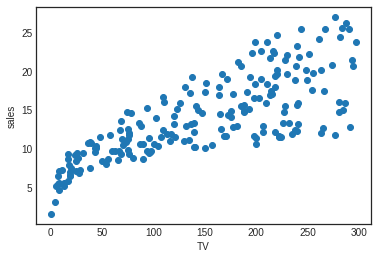

In [3]:
# Visualization
X0 = advertising.TV
y = advertising.Sales
plt.scatter(X0,y)
plt.xlabel("TV")
plt.ylabel("sales")

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line:

In [4]:
# Simple linear regression
## Fit a simple linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = X0.values.reshape(-1,1)
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

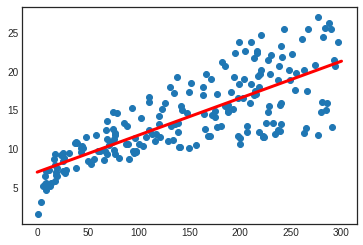

In [5]:
## Make prediction of Y based on a sequence of X value (xfit)
xfit = np.linspace(0,300,1000)
yfit = regr.predict(xfit[:, np.newaxis])
plt.scatter(X, y)
plt.plot(xfit, yfit,color = 'r',linewidth = 3);

The slope and intercept of the data are contained in the `regr`'s fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are `coef_` and `intercept_`: 

In [6]:
print("Model slope:    ", regr.coef_)
print("Model intercept:", regr.intercept_)

Model slope:     [0.04753664]
Model intercept: 7.032593549127695


The $R^2$ statistics is calculated below which gives $R^2 = 0.61$, and so just under two-thirds of the variability in `sales` is explained by a linear regression on `TV`.

In [7]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

The code below computes RSS for a number of values of $\beta_0$ and $\beta_1$ using the advertising data with 
`sales` as response and `TV` as the predictor. In each plot, the red dot represents the pair of least squares estimates $(\hat{\beta}_0,\hat{\beta}_1)$. These values clearly minimize the RSS. 

In [8]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50) # beta_0 sequence
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50) # beta_1 sequence
xx, yy = np.meshgrid(B0, B1, indexing='xy') # create a mesh spanned by beta_0 and beta_1
Z = np.zeros((B0.size,B1.size)) # create a zero matrix to store the RSS value

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
print("RSS corresponding the the least squares estimate (min_rss):    ", min_rss)

RSS corresponding the the least squares estimate (min_rss):     2.1025305831313514


(0.02, 0.07)

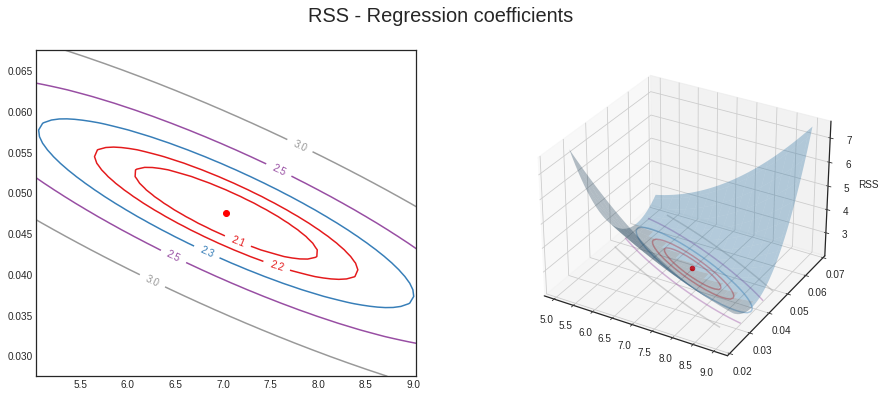

In [9]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

In [10]:
# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

## Multiple Linear Regression
Simple linear regression is a useful approach for predicting a response
on the basis of a single predictor variable. However, in practice we often have more than one predictor. Suppose that we have $p$ distinct predictors, the multiple linear regression model takes the form 
$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots +\beta_pX_p + \epsilon, 
$$
where $X_j$ represents the $jth$ predictor and $\beta_j$ quantifies the association between that variable and the response. 

* **Coefficient Estimation**: As was the case in the simple linear regression setting, the regression coefficients $\beta_0, \beta_1,\cdots,\beta_p$ are unknown and can be estimated using the same least squares approach. 
* **Model Assessment**: Two numerical measures of model fit RSE and $R^2$ are computed and interpreted in the same fashion as for simple linear regression. 

### Example
We consider a linear regression fit to `sales` using `TV` and `radio` as predictors. 

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = advertising[['Radio', 'TV']]
y = advertising.Sales
regr.fit(X,y)

print("Coefficient of Radio :", regr.coef_[0])
print("Coefficient of TV :", regr.coef_[1])
print("Model intercept:", regr.intercept_)

Coefficient of Radio : 0.1879942266203091
Coefficient of TV : 0.04575481510107615
Model intercept: 2.9210999124051398


In [12]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

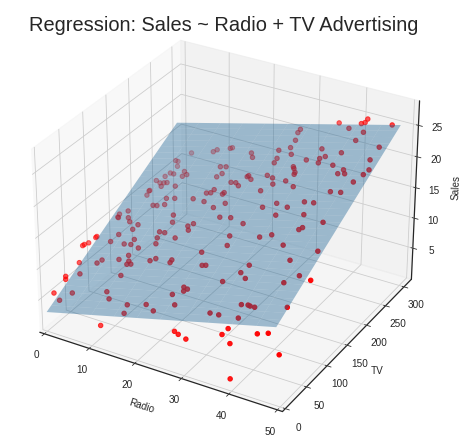

In [34]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)
ax = axes3d.Axes3D(fig)
ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')
ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

## Polynomial Regression
Historically, the standard way to extend linear regression to settings in which the relationship between the predictors and the response is non-linear has been to replace the standard linear model
$$
y_i = \beta_0 + \beta_1x_i + \epsilon_i
$$
with a polynomial function 
$$
y_i = \beta_0+\beta_1x_i+\beta_2x_i^2+...+\beta_dx_i^d + \epsilon_i
$$
where $\epsilon_i$ is the error term. This approach is known as *polynomial regression*. 

### Matrix Representation
Following the notation we defined in the simple linear regression, the polynomial regression model
$$
y_i = \beta_0+\beta_1x_i+\beta_2x_i^2+...+\beta_dx_i^d + \epsilon_i
$$
can be expressed in matrix form in terms of a design matrix $X$ and a response vector $Y$ such that 
$$
Y = X\boldsymbol{\beta} + \boldsymbol{\epsilon}
$$
where 
$$
X = \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^d \\ 1 & x_2 & x_2^2 & \dots & x_2^d \\ 1 & x_3 & x_3^2 & \dots & x_3^d \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^d \end{bmatrix}
$$
Then the vector of estimated polynomial regression coefficients is
$
\hat{\boldsymbol{\beta}} = (X^TX)^{-1}X^TY$$
$.

### Example

The dataset `Congress` contains the congress's approval ratings from 1974 to 2012. Our goal it to develop a model to describe the trend of the approval ratings. 

There are two columns in the dataset, we will use `Year` as predictor $X$ and `Rating` as response variable $Y$. 

In [37]:
congress = pd.read_csv("https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Congress.csv", header = 0)
Rating = congress.Rating.to_numpy().reshape(-1, 1)
Year = congress.Year.to_numpy().reshape(-1, 1)
congress.head()

,Rating,Year
0,10,2012.710959
1,16,2012.628767
2,17,2012.541096
3,15,2012.445205
4,17,2012.379452


In [48]:
# dataset reshape
data_test = np.arange(1974, 2013, step = 0.1).reshape(-1, 1)

# Linear Regression Model: Rating ~ Year
fit_lm = linear_model.LinearRegression()
fit1 = fit_lm.fit(Year, Rating)
y1 = fit1.predict(data_test)

# Polynomial Regression Model: Rating ~ Year + Year^2
from sklearn.preprocessing import PolynomialFeatures
x_poly_2 = PolynomialFeatures(degree = 2).fit_transform(Year)
fit2 = fit_lm.fit(x_poly_2, Rating)
y2 = fit2.predict(PolynomialFeatures(degree = 2).fit_transform(data_test))

# Polynomial Regression Model: Rating ~ Year + Year^2 + Year^3
x_poly_3 = PolynomialFeatures(degree = 3).fit_transform(Year)
fit3 = fit_lm.fit(x_poly_3, Rating)
y3 = fit3.predict(PolynomialFeatures(degree = 3).fit_transform(data_test))

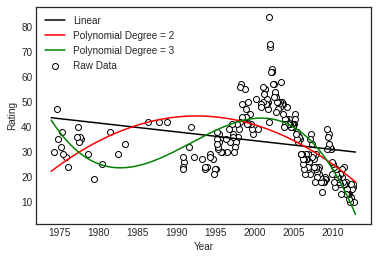

In [52]:
# Visualization
plt.scatter(Year, Rating, color = "white", edgecolor = "black", label="Raw Data")
plt.plot(data_test, y1, '-', color = "black", label="Linear")
plt.plot(data_test, y2, '-', color = "red", label="Polynomial Degree = 2")
plt.plot(data_test, y3, '-', color = "green", label="Polynomial Degree = 3")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend();

## Regularization
The introduction of basis functions (e.g. polynomial basis functions) into the linear regression makes the model much more flexible, but it could lead to *over-fitting*. 

The over-fitting problem often happens when the model is very complex and thereby the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data (test data).

<img src="images/Under_Over_Fitting.png" width="600"/>

We will illustrate this problem by a regression problem using Gaussian basis function. Let's first create a data set $(x,y)$ with
$$y = sin(x) + \epsilon$$

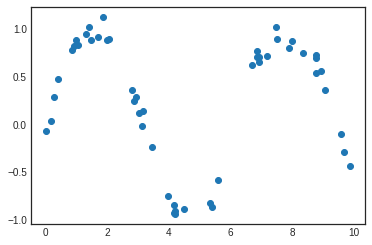

In [53]:
# Generate data pair(x,y) such that y = sin(x) + epsilon
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y);

In [56]:
# The Gaussian basis functions are not built into Scikit-learn, therefore, we define a custome
# transformer class in this code chunk. 
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
# @classmethod and @staticmethod are two python decorators
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

(-1.5, 1.5)

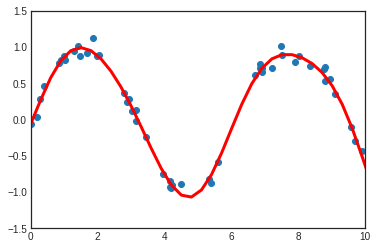

In [18]:
# Use 10 Gaussian bases to construct the regression model. 

gauss_model = make_pipeline(GaussianFeatures(10),
                            linear_model.LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color = 'r',linewidth = 3)
plt.xlim(0, 10);
plt.ylim(-1.5,1.5)

(-4.0, 1.5)

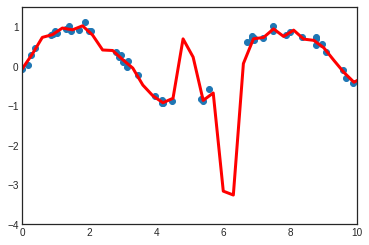

In [19]:
# Use 30 Gaussian bases to construct the regression model. 

gauss_model = make_pipeline(GaussianFeatures(30),
                            linear_model.LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

# Visualization
### The fitted curve
plt.scatter(x, y)
plt.plot(xfit, yfit, color = 'r',linewidth = 3)
plt.xlim(0, 10);
plt.ylim(-4,1.5)

With 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data. To get rid of this problem, we can fit a model containing all p predictors using a technique that *constrains* or *regularizes* the coefficient estimates, or equivalently, that shrinks the coefficient estimates towards zero. Hence shrinkage methods can also perform variable selection. We will introduce two types of shrinkage methods: 

- Ridge Regression 
- Lasso Regression 



### Ridge Regression ($L_2$ regularization)

The most common form of regularization is known as *ridge regression* or *$L_2$ regularization*. This proceeds by penalizing the sum of squares of the model coefficients.  Recall the least squares fitting procedure estimates $\beta_0,\beta_1,...,\beta_p$ using the values that minimize
$$
RSS = \sum_{i = 1}^n\left(y_i - \beta_0-\sum_{j = 1}^p \beta_jx_{ij}\right)^2
$$

The ridge regression coefficient estimates $\beta_0,...,\beta_p$ by minimizing 
$$
\sum_{i = 1}^n\left(y_i - \beta_0-\sum_{j = 1}^p \beta_jx_{ij}\right)^2 + \lambda\sum_{j = 1}^p\beta_j^2,
$$
where $\lambda$ is a *tuning parameter* that controls the strength of the penalty. This type of penalized model is build into Scikit-Learn with `Ridge` estimator:

(-1.5, 1.5)

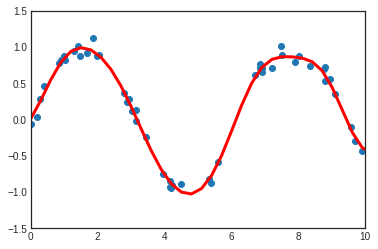

In [20]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

## Visualization
plt.scatter(x, y)
plt.plot(xfit, yfit, color = 'r',linewidth = 3)
plt.xlim(0, 10);
plt.ylim(-1.5,1.5)

### Lasso regression ($L_1$ regularization)
Another very common type of regularization is Lasso regression and it involves penalizing the sum of absolute values of regression coefficients. 

One obvious **disadvantage of ridge regression** is the the penalty $\lambda\sum\beta_j^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero.  This can create a challenge in the model interpretation in setttings in which the number of variables $p$ is quite large. 

The *lasso* is a relatively recent alternative to ridge regression that overcomes this disadvantage. The lasso coefficients are estimated by minimizing 
$$
\sum_{i = 1}^n\left(y_i - \beta_0-\sum_{j = 1}^p \beta_jx_{ij}\right)^2 + \lambda\sum_{j = 1}^p|\beta_j|,
$$

/home/jtao/Projects/venv/lib64/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021358158704841146, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


(-1.5, 1.5)

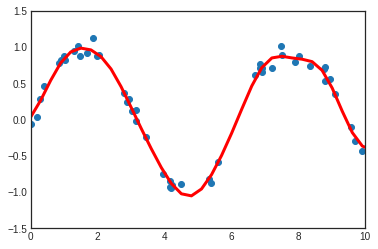

In [21]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

## Visualization
plt.scatter(x, y)
plt.plot(xfit, yfit, color = 'r',linewidth = 3)
plt.xlim(0, 10)
plt.ylim(-1.5,1.5)

## 5 Logistic Regression

#### Linear Classifier
The basic idea behind a linear classifier two target classes can be separated by a hyperplane in the feature space. If this can be done without error, the training set is called linearly separable. 



In [22]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/XiaomengYan/MachineLearning_dataset/blob/main/linear_classifier.png?raw=true", width=400, height=400)


We will introduce the *logistic regression* using the `Default` dataset provided by *ISRL R package*. This is  simulated data set containing information on ten thousand customers. **The goal is to predict which customers will `default` on their credit card debt based on their `balance` and `income`.**

Columns: 
* `default`: A factor with levels No and Yes indicating whether the customer defaulted on their debt
* `balance`: The average balance that the customer has remaining on their credit card after making their monthly payment
* `income`: Income of customers

In [23]:
df = pd.read_excel('https://github.com/XiaomengYan/MachineLearning_dataset/blob/main/Default.xlsx?raw=true',usecols=[1,3,4])

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df.head()

/home/jtao/Projects/venv/lib64/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,default,balance,income,default2
0,No,729.526495,44361.625074,0
1,No,817.180407,12106.134700,0
2,No,1073.549164,31767.138947,0
3,No,529.250605,35704.493935,0
4,No,785.655883,38463.495879,0


/home/jtao/Projects/venv/lib64/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jtao/Projects/venv/lib64/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


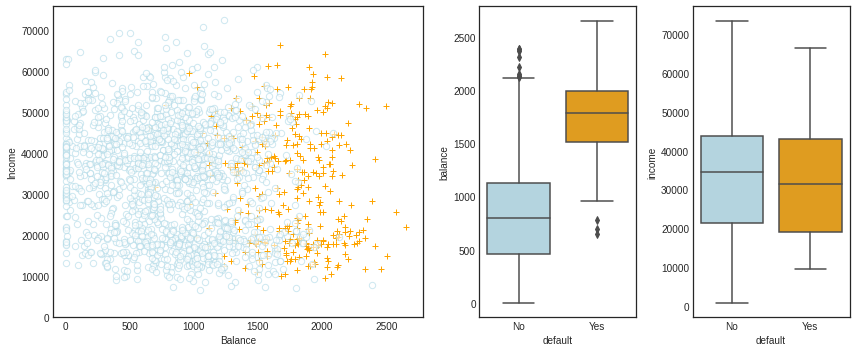

In [24]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, edgecolors='lightblue',facecolors = 'white', marker='o',
            linewidths=1,alpha = 0.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

Consider the Default data set where the response default falls into one of two categories, Yes or No. Rather than modeling this reponse Y directly, logistic regression models the *probability* that Y belongs to a particular category. How should we model the relationship between $p(X) = P(Y = 1|X)$ and $X$? (For convenience we are using the generic 0/1 coding for the response). 

`Logistic regression` belongs to generalized linear models, i.e, it's a linear model with a link function that maps the output of linear multiple regression to the posterior probability of class 1 using the logistic sigmoid function: 
$$
p(X) = \frac{e^{\beta_0+\beta_1X_1 + \cdots +\beta_p X_p}}{1+e^{\beta_0+\beta_1X_1 + \cdots +\beta_p X_p}}
$$
where $X = (X_1,...,X_p)$ are p predictors. After a bit of manipulation of the equation, we find that 
$$
\log(\frac{p(X)}{1-p(X)}) = \beta_0+\beta_1X_1 + \cdots +\beta_p X_p
$$
The quantity $p(X)/1-p(X)$  is called the *odds*, and can take on any value between $0$ and $\infty$. The term $\log(\frac{p(X)}{1-p(X)})$ is called the *log-odds* or *logit*. 
#### Estimate the Regression Coefficients
The coefficients $\beta_0$ and $\beta_1$ are unknown, and must be estimated based on the avaiable training data. In the linear regression, we use the least squares approach to estimate the unknown linear regression coefficients. For logistic regression, the **loss function** for sample $i$ is the negative log of the probability: 
$$
l(\beta_0,\beta_1) = \prod_{i:y_i = 1}p(x_i)\prod_{i':y_{i'} = 0}(1-p(x_{i'}))
$$
The estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ are chosen to *maximize* the loss function. 

`Logistic (Sigmoid) Function` is presented below: 


Text(0.5, 1.0, 'Logistic (sigmoid)')

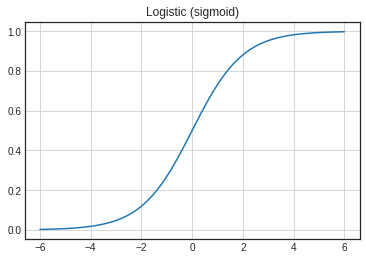

In [25]:
def logistic(x): return 1 / (1 + np.exp(-x))
x = np.linspace(-6, 6, 100)
plt.plot(x, logistic(x)) 
plt.grid(True) 
plt.title('Logistic (sigmoid)')

In [26]:
X = df[['balance', 'income']]
y = df.default2
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X,y)

/home/jtao/Projects/venv/lib64/python3.8/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jtao/Projects/venv/lib64/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jtao/Projects/venv/lib64/python3.8/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jtao/Projects/venv/lib64/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/jtao/Projects/venv/lib64/python3.8/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

#### Assess the Accuracy of the Model
In the field of statistical classification, a *confusion matrix*, also known as an error matrix, is a specific table layout that allows visualization of the performance of an supervised learning algorithm. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa).

In [27]:
y_pred = clf.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
pd.DataFrame(confusion_matrix,columns = ["No","Yes"],index = ["No","Yes"])

,No,Yes
No,9630,37
Yes,225,108


The confusion matrix tells us that we have $9630 + 108$ correct predictions and $225 + 37$ wrong predictions.

## 6 Exercise
The `Auto` dataset provides the information for 392 vehicles. This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.The data set has 392 observations with 9 variables: 

- `mpg`: miles per gallon
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight(lbs)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name


#### （a） Load the data Auto.csv and remove the missing values from the dataset.
`Instructions`: 
1. Use the `read_csv` function in `pandas` to read the dataset. 
2. There are 16 missing values in the original dataset and they are marked with "?". The argument `na_values` can help to identy the missing values when the dataset is read. 
3. The `dropna` function will drop the observations with missing values automatically. 

In [28]:
auto = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/Auto.csv', na_values='?').dropna()
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### (b) Perform a simple linear regression with mpg as the response (target) and horsepower as the predictor. Calculate the $R^2$. Comment on the output.
`For example:`
1. Is there a relationship between the predictor and the response? Is the relationship between the predictor and the response postive or negative?
2. How strong is the relationship between the predictor and the response? 

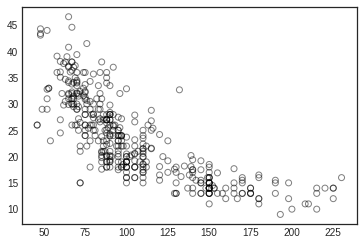

In [29]:
Horsepower = auto.horsepower.to_numpy().reshape(-1, 1)
Mpg = auto.mpg.to_numpy().reshape(-1, 1)
plt.scatter(Horsepower, Mpg, facecolors='None', edgecolors='k', alpha=.5) 

Coefficient of Horsepower : [-0.15784473]
Model intercept: [39.93586102]
R2: 0.6059482578894348


Text(0, 0.5, 'mpg')

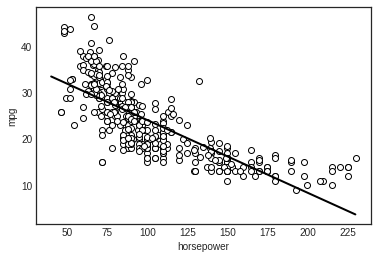

In [30]:
# Linear regression
## generate new dataset 
Horsepower_test = np.arange(40, 230, step = 0.1).reshape(-1, 1)

#######################
## Linear Regression Model: Rating ~ Year
#########################
from sklearn import linear_model
fit_lm = linear_model.LinearRegression()
fit1 = fit_lm.fit(Horsepower, Mpg)
y1 = fit1.predict(Horsepower_test)

#########################
## Print the coefficients (beta_0 and beta_1)
########################
print("Coefficient of Horsepower :", fit1.coef_[0])
print("Model intercept:", fit1.intercept_)

########################
## Calcuate the R2
#######################
Mpg_pred = fit_lm.predict(Horsepower)
print("R2:",r2_score(Mpg, Mpg_pred))

##########################
##Visualize the fitting result 
###########################
plt.scatter(Horsepower, Mpg, color = "white", edgecolor = "black")
plt.plot(Horsepower_test, y1, '-', color = "black", linewidth = 2)
plt.xlabel("horsepower")
plt.ylabel("mpg")

1. Is there a relationship between the predictor and the response? Is the relationship between the predictor and the response postive or negative?

Yes, with the increase of the horsepower, the mpg decreases accordingly and this suggests that there is negative a relationship between the predictor and the response. 

2. How strong is the relationship between the predictor and the response? 

For a unit increase in horsepower, the mpg fitted by model will decrease by 0.1578. The $R^2 = 0.61$ suggests that about $61\%$ variability in mpg is explained by the linear regression on horsepower.



#### (c) Fit the regression model with higher order polynomials, e.g., order = 2, 5. Comment on the output and consider how to improve the performance of the model with order = 5 using regularization (e.g., $l_1$ penalty). 

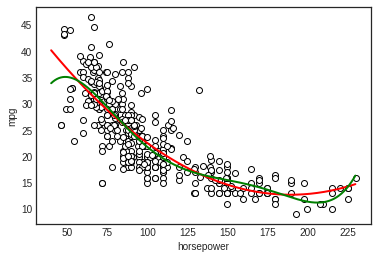

In [31]:
###########################
## Polynomial Regression Model: Rating ~ Year + Year^2
###########################
from sklearn.preprocessing import PolynomialFeatures
Horsepower_poly_2 = PolynomialFeatures(degree = 2).fit_transform(Horsepower)
fit2 = fit_lm.fit(Horsepower_poly_2, Mpg)
y2 = fit2.predict(PolynomialFeatures(degree = 2).fit_transform(Horsepower_test))

################################
## Polynomial Regression Model: Rating ~ Year + Year^2 + Year^3 + Year^4 + Year^5
###################################
Horsepower_poly_5 = PolynomialFeatures(degree = 5).fit_transform(Horsepower)
fit5 = fit_lm.fit(Horsepower_poly_5, Mpg)
y5 = fit5.predict(PolynomialFeatures(degree = 5).fit_transform(Horsepower_test))

##############################
## Visualization
###############################
plt.scatter(Horsepower, Mpg, color = "white", edgecolor = "black")
plt.plot(Horsepower_test, y2, '-', color = "red", linewidth = 2)
plt.plot(Horsepower_test, y5, '-', color = "green", linewidth = 2)
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

/home/jtao/Projects/venv/lib64/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3679.5936888258384, tolerance: 2.3818993469387753
  model = cd_fast.enet_coordinate_descent(


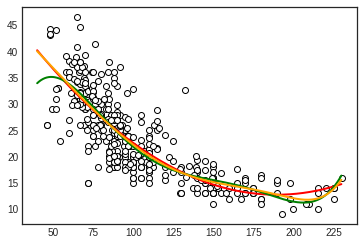

In [32]:
from sklearn.linear_model import Lasso
model_lasso = make_pipeline(PolynomialFeatures(degree = 5), Lasso(alpha=0.01))
model_lasso.fit(Horsepower_poly_5,Mpg)
yfit_lasso = model_lasso.predict(PolynomialFeatures(degree = 5).fit_transform(Horsepower_test))

plt.scatter(Horsepower, Mpg, color = "white", edgecolor = "black")
plt.plot(Horsepower_test, y2, '-', color = "red", linewidth = 2)
plt.plot(Horsepower_test, y5, '-', color = "green", linewidth = 2)
plt.plot(Horsepower_test, yfit_lasso, '-', color = "orange", linewidth = 2)



# Advanced Forecasting Model - Facebook Prophet


This report is a simple illustration of how Facebook Prophet works. The main idea of applying Prophet to detect the anomalies is following:

1. build the Prophet forecasting model based on the current existing data
2. forecast the future values with its prediction interval
3. when the new data come, detect whether the data is beyond the prediction interval or not. If yes, assign the new data as `anomalies`

The Prophet forecasting model is based on the following formula
$$y(t) = g(t) + s(t) + h(t) + \epsilon_t,$$
where $y(t)$ are the observations at time $t, t=1,\dots, T$ (training data). $g(t)$, $s(t)$, $h(t)$ are the **trend**, **seasonality**, **holiday** components respectively.

The trends are modeled by a logistic (S-shape trend) function or a piecewise linear function. The seasonalities are modeled by the Fourier series. The holidays are modeled by the indicators. The illustration of the detailed model can be found in https://peerj.com/preprints/3190v2/

The forecasting procedure is: first obtain the estimating of these three components $\widehat{g}(t)$, $\widehat{s}(t)$, $\widehat{h}(t)$. At the new time point $T+1$, forecast the output value $\widehat{y}(T+1) = \widehat{g}(T+1) + \widehat{s}(T+1) + \widehat{h}(T+1)$.

Pros of Prophet:

1. Flexibility: We can easily accommodate seasonality with multiple periods and let the analyst make different assumptions about trends.
2. Not neccessary time regularly spaced
3. Fast computation
4. Easily interpretable components


## Underwood Electricity Daily Data

We simply consider the electricity daily data (univariate time series) of Underwood Residence Hall. The data are presented below.

To utilize Facebook Prophet forecasting model, the column names must be `ds` (the data timestamps) and `y` (the numeric values) respectively.

### Data Structure

In [ ]:
# underwood electricity daily data
df1 = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Energy Consumption Project (Students Only)/underwood_daily.csv',index_col=0))

df1["DS"] = pd.to_datetime(df1["DS"],format="%Y-%m-%d")
df1.columns = ["ds","y"]  # change the column names
print(df1.columns.values.tolist())
df1 = df1.drop(index=[732])
df1

FileNotFoundError: ignored

In [95]:
df = pd.read_csv("data/Heart.csv")

In [96]:
df

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,NaN
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,NaN
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,NaN
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,NaN
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,NaN
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,NaN
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,NaN
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,NaN


## Forecasting

We then use the Prophet function to forecast the future values. To verify the forecasting model, we separate the electricity daily data into two parts. First part is the values from day 1 to day 700 as the training data, while the second part is the rest of days.

The arguments `daily_seasonality`, `yearly_seasonality`, and `weekly_seasonality` can be manually controlled based on training data. `interval_width` from 0 to 1 controls the size of forecasting confidence intervals. The higher `interval_width` is, the larger confidence interval is.

We also consider the holiday effects during forecasting, since the holidays do affect the electricity consumptions.

In [ ]:
# import Prophet
from fbprophet import Prophet

In [ ]:
# model fitting and forecasting
m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,interval_width=0.8)
m.add_country_holidays(country_name='US')
m.fit(df1[1:700])
future = m.make_future_dataframe(periods=31) # future 31 time points

forecast = m.predict(future) # forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,2020-12-27,1138.650306,1004.826192,1270.913573
726,2020-12-28,1157.944594,1025.788060,1278.602754
727,2020-12-29,1174.530786,1056.843736,1303.440306
728,2020-12-30,1211.270953,1080.465746,1334.637938
729,2020-12-31,1252.609571,1130.393903,1394.502155


In [ ]:
# compare the true values with the forecast values
df1[726:731]

,ds,y
727,2020-12-27,1239.404
728,2020-12-28,1236.131
729,2020-12-29,1236.158
730,2020-12-30,1231.908
731,2020-12-31,1239.242


In [ ]:
m.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10    Independence Day (Observed)
dtype: object

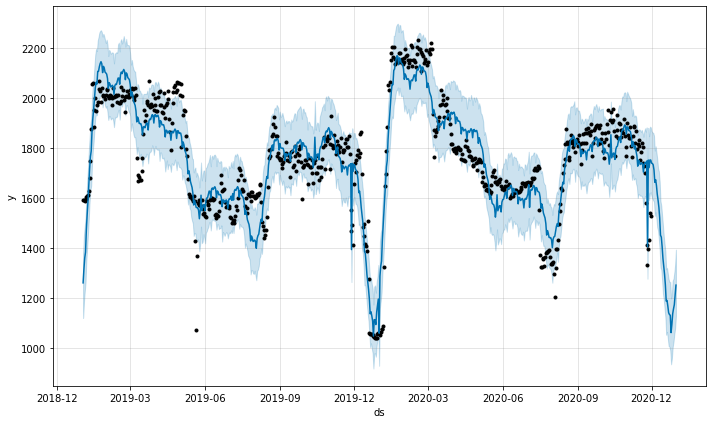

In [ ]:
# plot the model fitting and forecasting with pointwise confidence intervals.
fig1 = m.plot(forecast)

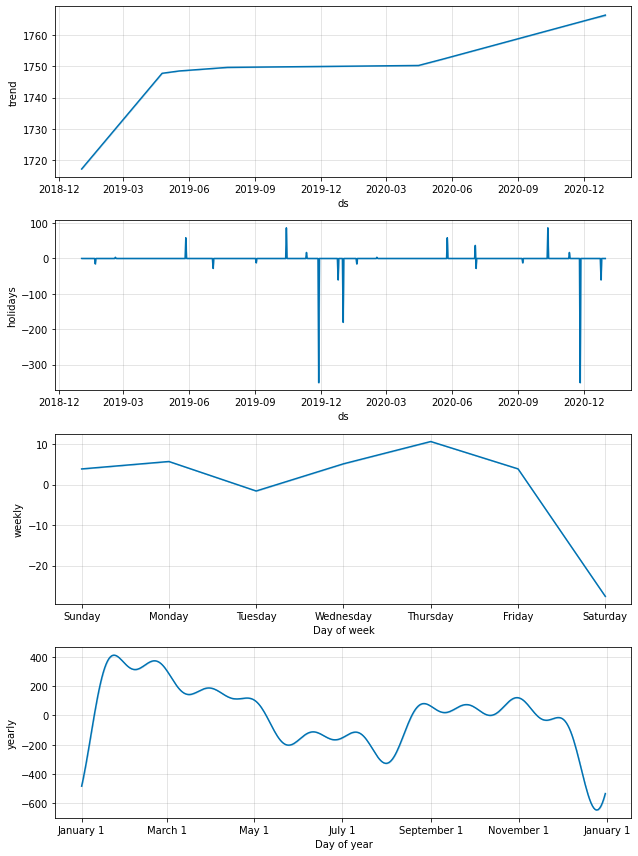

In [ ]:
# different components 
fig2 = m.plot_components(forecast)

In [ ]:
# interactive plots
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# Automatic anomaly detection

We develop the `anomalydetection` function to detect the anomalies via Facebook Prophet.

The inputs are `data_train`, `data_test`, and `interval_width`, while the outputs are the labels of `normal data` or `anomalies`.

Also, we can manually control the different seasonalities in the inner function.


In [ ]:
# The automatic anomaly detection function
# inputs
# data_train: the training data consist two columns: first column 'ds' represents the timestamps; 
#               second column 'y' represents the numeric values.
# data_test: the testing data with two columns similar to data_train.
# interval_width: the width of prediction interval
# outputs
# labels: the labels indicating the testing data are anomalies or not.

def anomalydetection(data_train,data_test,interval_width):
  from fbprophet import Prophet
  m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,interval_width=interval_width)
  m.add_country_holidays(country_name='US')
  m.fit(data_train)
  future = m.make_future_dataframe(periods=data_test.shape[0])
  forecast = m.predict(future)

  intervals = forecast[(data_train.shape[0]):(data_train.shape[0]+data_test.shape[0])][['ds','yhat_lower','yhat_upper']]

  labels = []
  for i in range(data_test.shape[0]):
    if data_test.iloc[i-1].at['y'] > intervals.iloc[i-1].at['yhat_lower'] and data_test.iloc[i-1].at['y'] < intervals.iloc[i-1].at['yhat_upper']:
      labels.append('Normal')
    else:
      labels.append('Anomaly')


  return labels


In [ ]:
# illustrating the automatic anomalydetection function by Underwood electricity data.
anomalydetection(df1[0:700],df1[700:731],interval_width=0.95)


['Normal',
 'Normal',
 'Anomaly',
 'Anomaly',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal']

# Concluding remarks

1. The inner function of `anomalydetection` can also be written via other different forecasting models. 
2. The Prophet function can work well when the data consist of strong periodicities/seasonalities. However, if the data are higher noisy, the performance of Prophet will not be very well.

# 1020 Vivarium

In [ ]:
df_1020_c= pd.read_csv("/content/drive/Shareddrives/TAMIDS-Energy Consumption Data Analysis/Data/1020_Vivarium III/1020_Vivarium III CHW Consumption.csv",header = 10,
                        na_filter = False)
df_1020_c = df_1020_c[['Timestamp', 'TAMU_VetSchool.1020_VivariumIII_CHW\nEnergy Consumption\n(MBTU 59)']]
df_1020_c.columns = ['Timestamp', '1020_Chilled_water']
df_1020_c = df_1020_c[:-2]
df_1020_c.dropna(inplace = True)
#df_1020_c["time"] = pd.to_datetime(df_1020_c["Timestamp"])
df_1020_c["Timestamp"] = pd.to_datetime(df_1020_c["Timestamp"])
df_1020_c.set_index('Timestamp', inplace = True)
df_1020_c

,1020_Chilled_water
Timestamp,
2019-01-01 01:00:00,"28,509,515.00"
2019-01-01 02:00:00,"28,509,804.00"
2019-01-01 03:00:00,"28,510,123.00"
2019-01-01 04:00:00,"28,510,413.00"
2019-01-01 05:00:00,"28,510,727.00"
...,...
2020-12-31 20:00:00,"35,835,025.00"
2020-12-31 21:00:00,"35,835,459.00"
2020-12-31 22:00:00,"35,835,868.00"


In [ ]:
i = pd.date_range(start = df_1020_c.index.min(), end = df_1020_c.index.max(), freq = 'H')
df_1020_c = pd.DataFrame({'Timestamp':i}).join(df_1020_c, on = 'Timestamp')
#df_1020_c.join(pd.DataFrame({'Timestamp':i}), on = 'Timestamp' )
df_1020_c.set_index('Timestamp', inplace = True)
df_1020_c

,1020_Chilled_water
Timestamp,
2019-01-01 01:00:00,"28,509,515.00"
2019-01-01 02:00:00,"28,509,804.00"
2019-01-01 03:00:00,"28,510,123.00"
2019-01-01 04:00:00,"28,510,413.00"
2019-01-01 05:00:00,"28,510,727.00"
...,...
2020-12-31 20:00:00,"35,835,025.00"
2020-12-31 21:00:00,"35,835,459.00"
2020-12-31 22:00:00,"35,835,868.00"


In [ ]:
df_1020_c["1020_Chilled_water"] = [str(df_1020_c["1020_Chilled_water"][i]).replace(',','') for i in range(len(df_1020_c["1020_Chilled_water"]))]
df_1020_c["1020_Chilled_water"]= pd.to_numeric(df_1020_c["1020_Chilled_water"], errors = 'coerce')
df_1020_c = df_1020_c.interpolate()
df_1020_c["1020_Chilled_Interval"] = df_1020_c["1020_Chilled_water"].diff()
df_1020_c["1020_Chilled_Interval"][0] = df_1020_c["1020_Chilled_Interval"][1]
df_1020_c['1020_Chilled_water'].resample("1d").count()[df_1020_c['1020_Chilled_water'].resample("1d").count() != 24]

Timestamp
2019-01-01    23
2019-11-03    25
2020-11-01    25
2021-01-01     1
Name: 1020_Chilled_water, dtype: int64

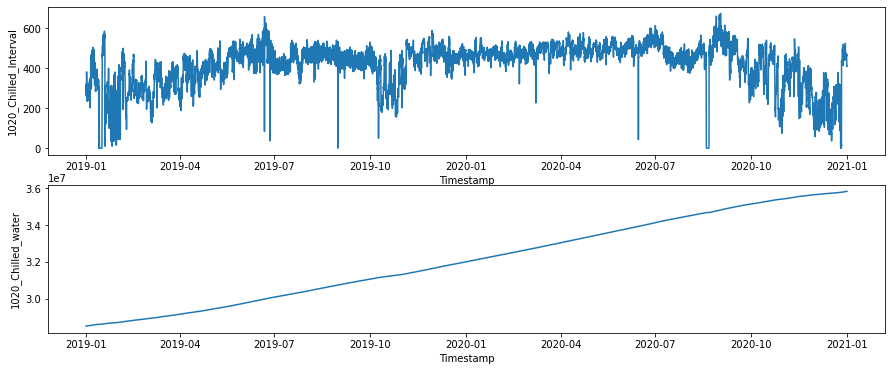

In [ ]:
fig, axes = pyplot.subplots(2, 1, figsize=(15, 6))
sns.lineplot(x='Timestamp', y='1020_Chilled_Interval', data=df_1020_c, ax = axes[0])
sns.lineplot(x = 'Timestamp', y = '1020_Chilled_water', data = df_1020_c, ax = axes[1])
# sns.scatterplot(x='Timestamp', y='1020_Chilled_Interval', data=df_1020_c, ax = axes[2])
#fig.savefig("Figures/1020_Chilled_water.jpg")

## 1020 Hot Water

In [ ]:
df_1020_h= pd.read_csv("/content/drive/Shareddrives/TAMIDS-Energy Consumption Data Analysis/Data/1020_Vivarium III/1020_Vivarium III HHW Consumption.csv",header = 10,
                        na_filter = False)
df_1020_h = df_1020_h[['Timestamp', 'TAMU_VetSchool.1020_VivariumIII_HHW\nEnergy Consumption\n(MBTU 59)']]
df_1020_h.columns = ['Timestamp', '1020_Hot_water']
df_1020_h = df_1020_h[:-2]
df_1020_h.dropna(inplace = True)
df_1020_h["Timestamp"] = pd.to_datetime(df_1020_h["Timestamp"])
df_1020_h.set_index('Timestamp', inplace = True)
j = pd.date_range(start = df_1020_h.index.min(), end = df_1020_h.index.max(), freq = 'H')
j
df_1020_h = pd.DataFrame({'Timestamp':j}).join(df_1020_h, on = 'Timestamp')
#df_1020_c.join(pd.DataFrame({'Timestamp':i}), on = 'Timestamp' )
df_1020_h.set_index('Timestamp', inplace = True)
df_1020_h["1020_Hot_water"] = [str(df_1020_h["1020_Hot_water"][i]).replace(',','') for i in range(len(df_1020_h["1020_Hot_water"]))]
df_1020_h["1020_Hot_water"]= pd.to_numeric(df_1020_h["1020_Hot_water"], errors = 'coerce')
df_1020_h = df_1020_h.interpolate()
df_1020_h["1020_Hot_Interval"] = df_1020_h["1020_Hot_water"].diff()
df_1020_h["1020_Hot_Interval"][0] = df_1020_h["1020_Hot_Interval"][1]
df_1020_h

,1020_Hot_water,1020_Hot_Interval
Timestamp,,
2019-01-01 01:00:00,10559581.0,424.0
2019-01-01 02:00:00,10560005.0,424.0
2019-01-01 03:00:00,10560444.0,439.0
2019-01-01 04:00:00,10560895.0,451.0
2019-01-01 05:00:00,10561392.0,497.0
...,...,...
2020-12-31 20:00:00,13941378.0,588.0
2020-12-31 21:00:00,13941973.0,595.0
2020-12-31 22:00:00,13942566.0,593.0


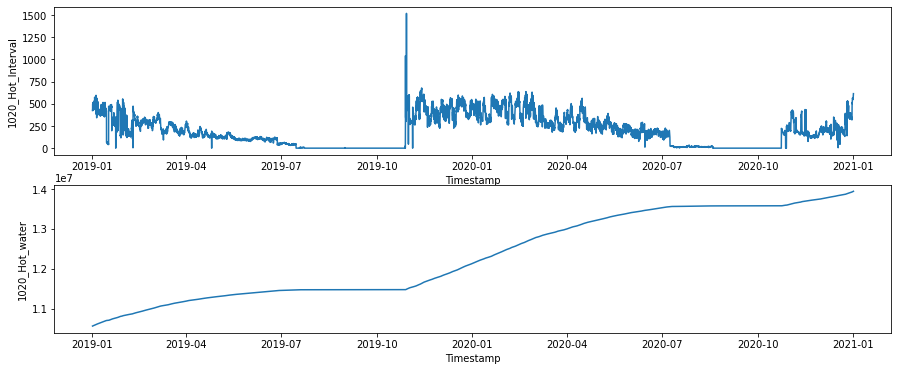

In [ ]:
fig1, axes = pyplot.subplots(2, 1, figsize=(15, 6))
sns.lineplot(x='Timestamp', y='1020_Hot_Interval', data=df_1020_h, ax = axes[0])
sns.lineplot(x = 'Timestamp', y = '1020_Hot_water', data = df_1020_h, ax = axes[1])
#fig1.savefig("Figures/1020_Hot_water.jpg")

# Facebook Prophet Forecasting Model for 1020 Vivarium

### Modeling Holidays and special events: holidays and other recurring events can be modeled by creating a dataframe.

In [ ]:
Thanksgiving = pd.DataFrame({
  'holiday': 'Thanksgiving Day',
  'ds': pd.to_datetime(['2019-11-28', '2019-11-29', '2020-11-26', '2020-11-27']),
#  'lower_window' : 0,
#  'upper_window' : 1
})

WinterBreak = pd.DataFrame({
    'holiday' : 'WinterBreak',
    'ds' : pd.to_datetime([
                           '2019-01-01', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2021-01-01', 
    ])
})

MartinLuther = pd.DataFrame({
  'holiday': 'Martin Luther King, Jr.Day',
  'ds': pd.to_datetime(['2019-01-21', '2020-01-20']),
})

SpringBreak  = pd.DataFrame({
  'holiday': 'Spring Break',
  'ds': pd.to_datetime(['2019-03-15', '2020-03-12', '2020-03-13']),
})

PersonalDay = pd.DataFrame({
  'holiday': 'Personal Day',
  'ds': pd.to_datetime(['2020-04-10']),
})

Memorial = pd.DataFrame({
  'holiday': 'Memorial Day',
  'ds': pd.to_datetime(['2019-05-27', '2020-05-25']),
})

Independence = pd.DataFrame({
  'holiday': 'Independence Day',
  'ds': pd.to_datetime(['2019-07-04']),
})




holidays = pd.concat((Thanksgiving, WinterBreak, MartinLuther, SpringBreak, PersonalDay, Memorial, Independence))
holidays

,holiday,ds
0,Thanksgiving Day,2019-11-28
1,Thanksgiving Day,2019-11-29
2,Thanksgiving Day,2020-11-26
3,Thanksgiving Day,2020-11-27
0,WinterBreak,2019-01-01
1,WinterBreak,2020-12-23
2,WinterBreak,2020-12-24
3,WinterBreak,2020-12-25
4,WinterBreak,2020-12-26
5,WinterBreak,2020-12-27


In [ ]:
df_CI = df_1020_c[['1020_Chilled_Interval']].resample("1d").sum()
df_CI = df_CI.reset_index()
df_CI.columns = ["ds", "y"]
df_CI = df_CI[0:731]
df_HI = df_1020_h[['1020_Hot_Interval']].resample("1d").sum()
df_HI = df_HI.reset_index()
df_HI.columns = ["ds", "y"]
df_HI = df_HI[0:731]
df_HI

,ds,y
0,2019-01-01,10443.0
1,2019-01-02,11320.0
2,2019-01-03,11718.0
3,2019-01-04,11295.0
4,2019-01-05,11235.0
...,...,...
726,2020-12-27,9994.0
727,2020-12-28,8533.0
728,2020-12-29,8646.0
729,2020-12-30,9511.0


In [ ]:
from fbprophet import Prophet

## Trend Changepoint: 

### Prophet Model: $y(t) = g(t) + s(t) + h(t) + \epsilon_t$.
#### the real time series frequently have abrupt changes in their trajectories.  Prophet firstly specify a large number of potential changepoints then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization), when visualizing the forecast, this parameter can be adjusted if the trend seems to be over- or under-fit.  If the trend $g(t)$ changes are being overfit (too much flexibility) or underfit (not enough flexibility), we can adjust the strength of the sparse prior. The default changepoint_prior_scale = 0.05.

#### Prior scale for holidays/seasonality. If one finds holidays/seasonality are over/underfitting, one can adjust the prior scale

In [ ]:
m_C = Prophet(daily_seasonality=False, yearly_seasonality= True, weekly_seasonality=True, interval_width=0.95, holidays=holidays, changepoint_prior_scale=0.05)
#m_C.add_country_holidays(country_name = 'US')
m_C.fit(df_CI[1:700])
future = m_C.make_future_dataframe(periods = 31)

forecast = m_C.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
725,2020-12-27,9230.908419,6506.296472,12042.217578
726,2020-12-28,9345.097009,6296.522037,12177.611400
727,2020-12-29,9406.380491,6397.774876,12729.233322
728,2020-12-30,9197.935552,6325.380771,12166.452080
729,2020-12-31,9277.931240,6309.768516,12482.929670


In [ ]:
df_CI[726:731]

,ds,y
726,2020-12-27,11051.0
727,2020-12-28,11233.0
728,2020-12-29,11308.0
729,2020-12-30,11700.0
730,2020-12-31,10981.0


In [ ]:
m_C.train_holiday_names

0              Thanksgiving Day
1                   WinterBreak
2    Martin Luther King, Jr.Day
3                  Spring Break
4                  Personal Day
5                  Memorial Day
6              Independence Day
dtype: object

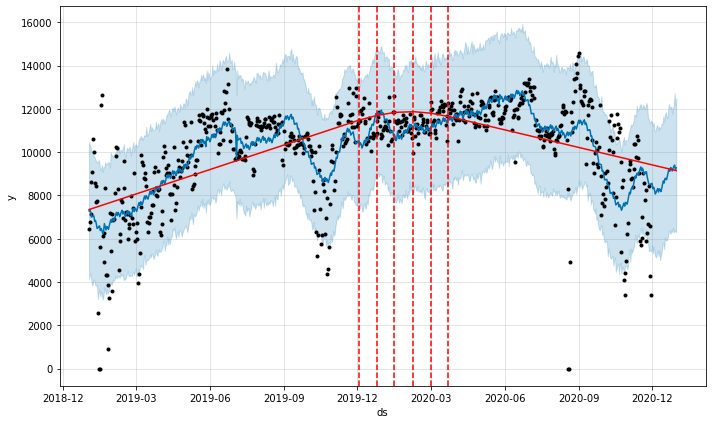

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig1 = m_C.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m_C, forecast)

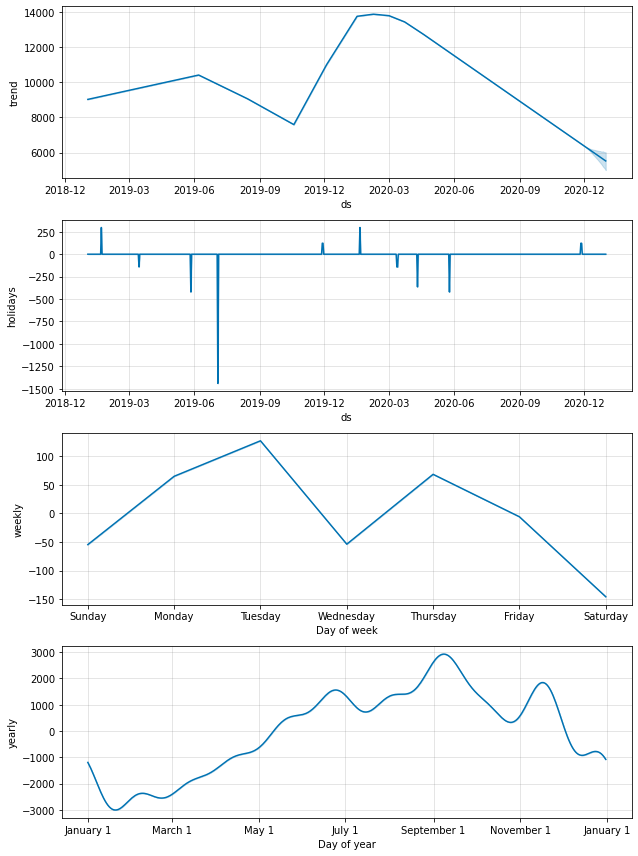

In [ ]:
fig2 = m_C.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_C, forecast)

In [ ]:
m_H = Prophet(daily_seasonality=False, yearly_seasonality= True, weekly_seasonality=True, interval_width=0.95, changepoint_prior_scale= 0.03, holidays=holidays)
#m_H.add_country_holidays(country_name = 'US')
m_H.fit(df_HI[1:700])
future_H = m_H.make_future_dataframe(periods = 31)
forecast_H = m_H.predict(future_H)
forecast_H[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,2020-12-27,8239.625372,5458.003217,11081.491696
726,2020-12-28,7936.221198,5158.117135,10740.947864
727,2020-12-29,7933.152019,5374.759114,10733.590725
728,2020-12-30,8012.155415,5382.129096,10635.904375
729,2020-12-31,7907.718417,5036.061213,10592.339465


In [ ]:
df_HI[726:731]

,ds,y
726,2020-12-27,9994.0
727,2020-12-28,8533.0
728,2020-12-29,8646.0
729,2020-12-30,9511.0
730,2020-12-31,13521.0


In [ ]:
m_H.train_holiday_names

0              Thanksgiving Day
1                   WinterBreak
2    Martin Luther King, Jr.Day
3                  Spring Break
4                  Personal Day
5                  Memorial Day
6              Independence Day
dtype: object

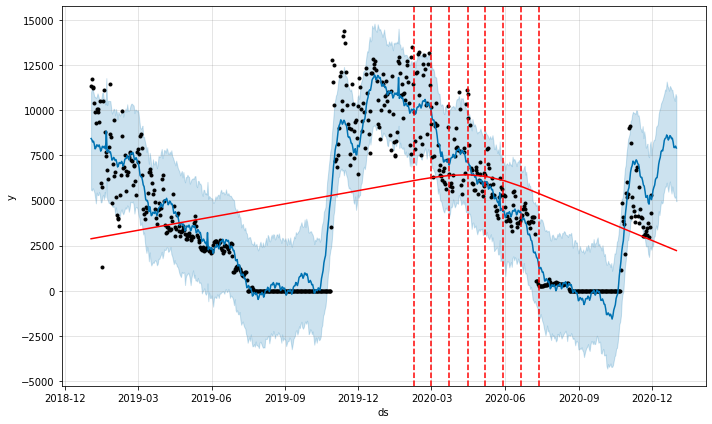

In [ ]:
fig2 = m_H.plot(forecast_H)
b = add_changepoints_to_plot(fig2.gca(), m_H, forecast_H)

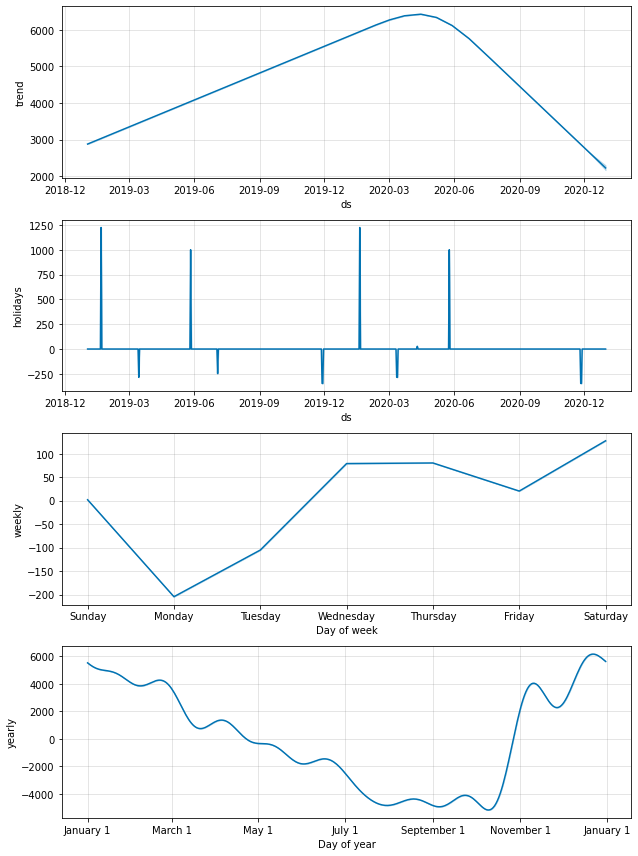

In [ ]:
fig2 = m_H.plot_components(forecast_H)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m_H, forecast_H)


### Cross Validation: selecting hyperparameters.

* This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. 
* We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

* The performance_metrics() can be used to compute some useful statistics of the predictive performance, as a function of the distance from the cutoff (how far into the future the prediction was).

* e.g. We do CV to asses prediction performance on a horizon of 120 days, starting with 390 days of training data in the first cut off and then making prediction every 60 days.


In [ ]:
from fbprophet.diagnostics import cross_validation
df_C_cv = cross_validation(m_C, initial = '390 days', period = '60 days', horizon = ' 120 days' )
df_C_cv

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-02-04 00:00:00 and 2020-08-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-05,11559.331792,8953.360175,14166.793904,11096.0,2020-02-04
1,2020-02-06,11800.994417,9349.495636,14240.153185,10894.0,2020-02-04
2,2020-02-07,11721.849212,9278.917604,14210.766735,10643.0,2020-02-04
3,2020-02-08,11607.757796,8990.729939,14031.093365,9945.0,2020-02-04
4,2020-02-09,11650.883577,9124.778095,14013.563863,11515.0,2020-02-04
...,...,...,...,...,...,...
475,2020-11-26,10056.873162,7834.704392,12286.389431,6672.0,2020-08-02
476,2020-11-27,9850.328869,7713.217754,12022.514972,8447.0,2020-08-02
477,2020-11-28,9953.684663,7912.891243,12238.819431,6574.0,2020-08-02
478,2020-11-29,9894.261508,7588.988782,12175.568088,4293.0,2020-08-02


In [ ]:
df_C_cv.cutoff.unique()
#df_C_cv[df_C_cv['cutoff'] == '2020-08-02 ']

array(['2020-02-04T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-06-03T00:00:00.000000000', '2020-08-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

INFO:fbprophet:Skipping MAPE because y close to 0


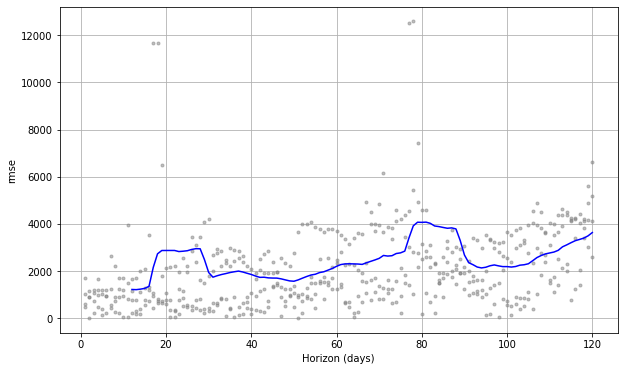

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_C_cv)
from fbprophet.plot import plot_cross_validation_metric
fig_rmse = plot_cross_validation_metric(df_C_cv, metric='rmse')

In [ ]:
# The automatic anomaly detection function
# inputs
# data_train: the training data consist two columns: first column 'ds' represents the timestamps; 
#               second column 'y' represents the numeric values.
# data_test: the testing data with two columns similar to data_train.
# interval_width: the width of prediction interval
# outputs
# labels: the labels indicating the testing data are anomalies or not.

def anomalydetection(data_train,data_test, interval_width, changepoint_prior_scale, seasonality_prior_scale, holidays = None):
  if holidays is None:
    m.add_country_holidays(country_name='US')
  outList = []
  if changepoint_prior_scale is None:
    m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,interval_width=interval_width, holidays=holidays)
  else:
    m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,interval_width=interval_width, holidays=holidays, changepoint_prior_scale=changepoint_prior_scale, seasonality_prior_scale = seasonality_prior_scale)
  m.fit(data_train)
  future = m.make_future_dataframe(periods=data_test.shape[0])
  forecast = m.predict(future)

  intervals = forecast[(data_train.shape[0]):(data_train.shape[0]+data_test.shape[0])][['ds','yhat_lower', 'yhat', 'yhat_upper']]

  labels = []
  for i in range(data_test.shape[0]):
    if data_test.iloc[i].at['y'] > intervals.iloc[i].at['yhat_lower'] and data_test.iloc[i].at['y'] < intervals.iloc[i].at['yhat_upper']:
      labels.append('Normal')
    else:
      labels.append('Anomaly')
  labels = pd.Series(labels, name = 'labels')
  df = pd.concat([intervals.reset_index(drop = True), labels, data_test[['y']].reset_index(drop = True)], axis = 1)
  # df_output = pd.concat([data_test, pd.to_datetime(labels)], axis = 1)
  outList.append(df)
  outList.append(holidays)
  return outList


In [ ]:
outList_C = anomalydetection(df_CI[0:700], df_CI[700:731], interval_width= 0.95, holidays=holidays, changepoint_prior_scale=0.05, seasonality_prior_scale = 0.5)

In [ ]:
outList_C[0]

,ds,yhat_lower,yhat,yhat_upper,labels,y
0,2020-12-01,5723.921990,8593.221366,11518.988169,Anomaly,3550.0
1,2020-12-02,5308.580094,8349.524817,11408.757052,Anomaly,5088.0
2,2020-12-03,5235.869930,8419.046469,11288.653109,Anomaly,3359.0
3,2020-12-04,5496.469038,8296.179592,11202.957631,Anomaly,3766.0
4,2020-12-05,5297.440472,8115.351932,10984.381061,Anomaly,4108.0
5,2020-12-06,5491.363981,8182.809655,11065.330453,Anomaly,4431.0
6,2020-12-07,5173.967917,8291.472894,11387.309531,Anomaly,4265.0
7,2020-12-08,5570.207168,8375.685024,11211.018558,Anomaly,4882.0
8,2020-12-09,5420.148494,8214.058737,11001.289781,Normal,5793.0
9,2020-12-10,5364.140427,8369.739395,11273.936448,Normal,5817.0


In [ ]:
outList_H = anomalydetection(df_HI[0:700], df_HI[700:731], interval_width= 0.95, holidays=holidays, changepoint_prior_scale=0.05, seasonality_prior_scale = 0.01)

In [ ]:
outList_H[0]

,ds,yhat_lower,yhat,yhat_upper,labels,y
0,2020-12-01,-393.304278,2468.662407,5354.950066,Normal,5079.0
1,2020-12-02,-346.990232,2596.946981,5349.161484,Normal,4156.0
2,2020-12-03,-120.468115,2592.206791,5487.939895,Normal,5005.0
3,2020-12-04,-229.507764,2576.727939,5508.199963,Normal,5005.0
4,2020-12-05,-52.775906,2719.801607,5628.304696,Anomaly,6172.0
5,2020-12-06,44.351117,2679.877806,5595.241484,Normal,5379.0
6,2020-12-07,-155.187575,2585.510383,5330.247734,Normal,4824.0
7,2020-12-08,-298.591891,2722.427352,5695.143888,Normal,4777.0
8,2020-12-09,48.171317,2937.157303,5737.217131,Normal,5115.0
9,2020-12-10,0.747195,3002.059620,5612.162739,Normal,4090.0


In [ ]:
import itertools 
import numpy as np 

param_grid = {
    'changepoint_prior_scale' : [0.001, 0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale' : [0.01, 0.1, 1.0, 5.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m_C = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True, holidays = holidays, **params).fit(df_CI[0:731])  # Fit model with given params
    df_CI_cv = cross_validation(m_C, initial = '390 days', period = '60 days', horizon='130 days', parallel="processes")
    df_CI_p = performance_metrics(df_CI_cv, rolling_window=1)
    rmses.append(df_CI_p['rmse'].values[0])

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-02-25 00:00:00 and 2020-08-23 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fef6b02cb50>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-02-25 00:00:00 and 2020-08-23 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fef6bd39090>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-02-25 00:00:00 and 2020-08-23 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fef6799dc10>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-02-25 00:00:00 and 2020-08-23 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fef6786

In [ ]:
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  3822.973591
1                     0.001                     0.10  3952.329995
2                     0.001                     1.00  3953.713621
3                     0.001                     5.00  3953.407245
4                     0.001                    10.00  3951.678255
5                     0.010                     0.01  3235.308759
6                     0.010                     0.10  3360.961857
7                     0.010                     1.00  3320.465560
8                     0.010                     5.00  3349.158091
9                     0.010                    10.00  3321.639225
10                    0.050                     0.01  2464.150708
11                    0.050                     0.10  3059.862030
12                    0.050                     1.00  3072.082986
13                    0.050                     5.00  3074.865868
14        

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}


In [ ]:
outList_C = anomalydetection(df_CI[0:700], df_CI[700:731], interval_width= 0.95, holidays=holidays, changepoint_prior_scale=0.1, seasonality_prior_scale= 0.01)
outList_C[0]

,ds,yhat_lower,yhat,yhat_upper,labels,y
0,2020-12-01,5647.372299,8532.485760,11418.991738,Anomaly,3550.0
1,2020-12-02,5681.541340,8338.867706,11048.756503,Anomaly,5088.0
2,2020-12-03,5515.779715,8380.198598,11271.807449,Anomaly,3359.0
3,2020-12-04,5375.189676,8275.671719,11110.150876,Anomaly,3766.0
4,2020-12-05,5096.011761,8121.051681,11066.929481,Anomaly,4108.0
5,2020-12-06,5291.650854,8158.770282,11061.525621,Anomaly,4431.0
6,2020-12-07,5252.496577,8226.669876,10981.703042,Anomaly,4265.0
7,2020-12-08,5109.386684,8275.173636,11259.084069,Anomaly,4882.0
8,2020-12-09,5001.469645,8139.452500,10999.520605,Normal,5793.0
9,2020-12-10,5278.695508,8242.392877,11038.506221,Normal,5817.0


In [ ]:
m_C_new =  Prophet(daily_seasonality=False, yearly_seasonality= True, weekly_seasonality=True, interval_width=0.95, holidays=holidays, changepoint_prior_scale=0.5, seasonality_prior_scale= 0.01)
#m_C.add_country_holidays(country_name = 'US')
m_C_new.fit(df_CI[0:731])
future_C_new = m_C_new.make_future_dataframe(periods=0)
forecast_C_new = m_C_new.predict(future_C_new)
forecast_C_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

labels = []
for i in range(forecast_C_new.shape[0]):
  if df_CI.iloc[i].at['y'] > forecast_C_new.iloc[i].at['yhat_lower'] and df_CI.iloc[i].at['y'] < forecast_C_new.iloc[i].at['yhat_upper']:
    labels.append('Normal')
  else:
    labels.append('Anomaly')
labels = pd.Series(labels, name = 'labels')

In [ ]:
Out_new = pd.concat([forecast_C_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].reset_index(drop = True), labels, df_CI[['y']].reset_index(drop = True)], axis = 1)
Out_new

,ds,yhat,yhat_lower,yhat_upper,labels,y
0,2019-01-01,8742.058210,5748.013554,11594.095972,Normal,7209.0
1,2019-01-02,6801.676657,4014.695901,9474.091427,Normal,6443.0
2,2019-01-03,6880.497165,3783.559085,9675.589591,Normal,6781.0
3,2019-01-04,6803.106022,4035.883736,9876.064806,Normal,7123.0
4,2019-01-05,6670.792337,3765.070341,9647.495020,Normal,8633.0
...,...,...,...,...,...,...
726,2020-12-27,8003.370440,5173.844671,10875.961942,Anomaly,11051.0
727,2020-12-28,8108.384290,5121.454669,10926.265206,Anomaly,11233.0
728,2020-12-29,8135.070661,5123.513710,11218.133811,Anomaly,11308.0
729,2020-12-30,8023.085866,5066.059569,11213.082216,Anomaly,11700.0


In [ ]:
Out_new[10:30]

,ds,yhat,yhat_lower,yhat_upper,labels,y
10,2019-01-11,6517.336818,3519.706693,9300.998343,Normal,8448.0
11,2019-01-12,6346.048215,3180.627809,9329.457609,Normal,7755.0
12,2019-01-13,6416.267814,3506.825028,9520.376546,Anomaly,2548.0
13,2019-01-14,6447.858883,3641.016466,9348.675298,Anomaly,0.0
14,2019-01-15,6420.102936,3289.609507,9261.570579,Anomaly,0.0
15,2019-01-16,6274.617909,3375.574940,9285.843182,Normal,5640.0
16,2019-01-17,6312.913320,3485.540369,9457.535492,Anomaly,12190.0
17,2019-01-18,6216.598542,3437.672654,9429.248440,Anomaly,12640.0
18,2019-01-19,6086.453509,3334.542022,8984.054792,Normal,6142.0
19,2019-01-20,6205.291757,3345.559724,9073.287765,Normal,4917.0
